## Import Necessary Packages

In [1]:
import numpy as np
import xarray as xr
import proplot as pplt
pplt.rc.update({'font.size':12})
import warnings
warnings.filterwarnings('ignore')

## User-Defined Fields

In [2]:
path   = # '/directory/where/large/domain/files/are/located/'
dirout = 'analysis'
cases  = ['nz_32','nz_64','nz_128']

## Plot Fig. 6

For each case, load in the corresponding Eq. 3 budget terms netCDF file. Plot the tendency of each term, comparing terms within each case.

(<matplotlib.legend.Legend at 0x1473d99069a0>,
 <matplotlib.legend.Legend at 0x1473d9896cd0>)

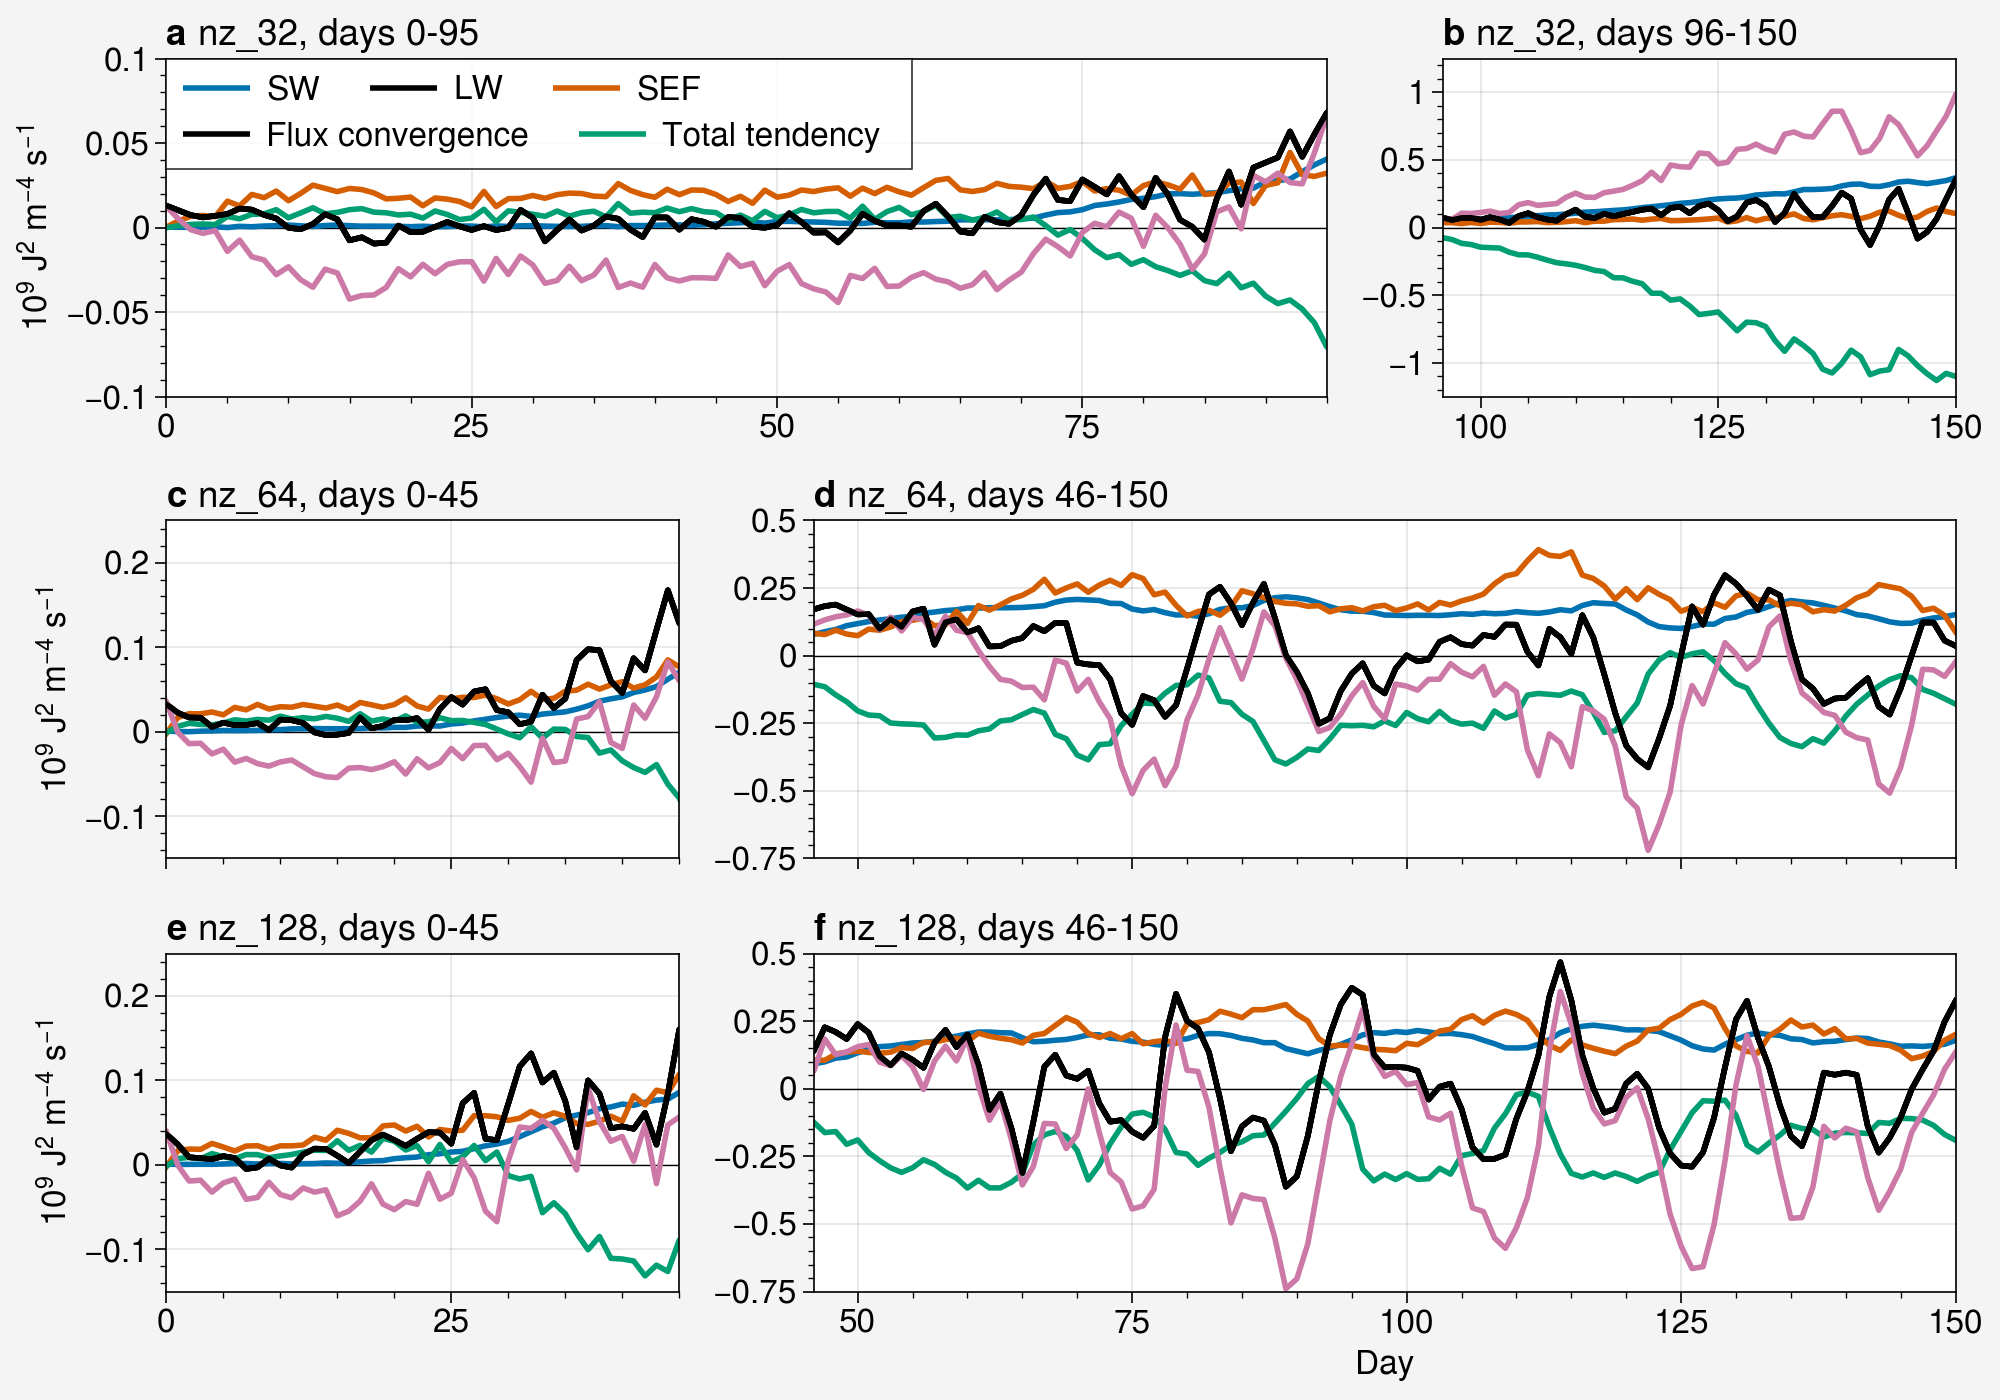

In [3]:
terms=['SW','LW','SEF','Flux convergence','Total tendency']; cycle='colorblind'; linewidth=2
fig,axs = pplt.subplots([[1,1,2],[3,4,4],[5,6,6]],height=7,width=10,sharex=True,sharey=False)
axs.format(xlabel='',ylabel='',xticks=25,abc='a',abcloc='l',titleloc='l')
axs.axhline(0,linewidth=0.5,color='k')
axs[0].format(title='nz_32, days 0-95',xlim=(0,95),ylim=(-0.1,0.1),ylabel='10$^{9}$ J$^{2}$ m$^{-4}$ s$^{-1}$')
axs[1].format(title='nz_32, days 96-150',xlim=(96,150),ylim=(-1.25,1.25))
axs[2].format(title='nz_64, days 0-45',xlim=(0,45),ylim=(-0.15,0.25),ylabel='10$^{9}$ J$^{2}$ m$^{-4}$ s$^{-1}$')
axs[3].format(title='nz_64, days 46-150',xlim=(46,150),ylim=(-0.75,0.5))
axs[4].format(title='nz_128, days 0-45',xlim=(0,45),ylim=(-0.15,0.25),ylabel='10$^{9}$ J$^{2}$ m$^{-4}$ s$^{-1}$')
axs[5].format(title='nz_128, days 46-150',xlabel='Day',xlim=(46,150),ylim=(-0.75,0.5))  
for case in cases:
    # Load budget terms file and subset terms
    ds = xr.load_dataset(path+dirout+'/eq3_fmse_budget_vars_'+case+'.nc')
    variables = [ds.SW,ds.LW,ds.SEF,ds.flux_conv]
    # Plot data
    for variable in variables:
        if case =='nz_32':
            axs[0:2].plot(variable,linewidth=linewidth,cycle=cycle)
            axs[0:2].plot(ds.total_tend,linewidth=linewidth,color='k')
        if case =='nz_64':    
            axs[2:4].plot(variable,linewidth=linewidth,cycle=cycle)
            axs[2:4].plot(ds.total_tend,linewidth=linewidth,color='k')
        if case =='nz_128':
            axs[4:6].plot(variable,linewidth=linewidth,cycle=cycle)
            axs[4:6].plot(ds.total_tend,linewidth=linewidth,color='k')
axs[0].legend(loc='ul',ncols=3,center=True,labels=terms)   